# E-Commerce 'SuperStore' EDA (Exploratory Data Analysis)

## Introduction:

SuperStore, a U.S. company with ambitions to expand its burgeoning E-Commerce business into Europe. They seek to transition to a more sustainable SQL database solution to enhance operational efficiency and scalability. In addition to this technical upgrade, SuperStore also wishes to conduct a comprehensive competitive analysis.
This endeavor aims to gather valuable insights that will inform their strategic approach and go-to-market strategy.

For our EDA analysis we gonna use the SQLite database created previously. This the design for our ERD (Entity-Relationship Diagram): 

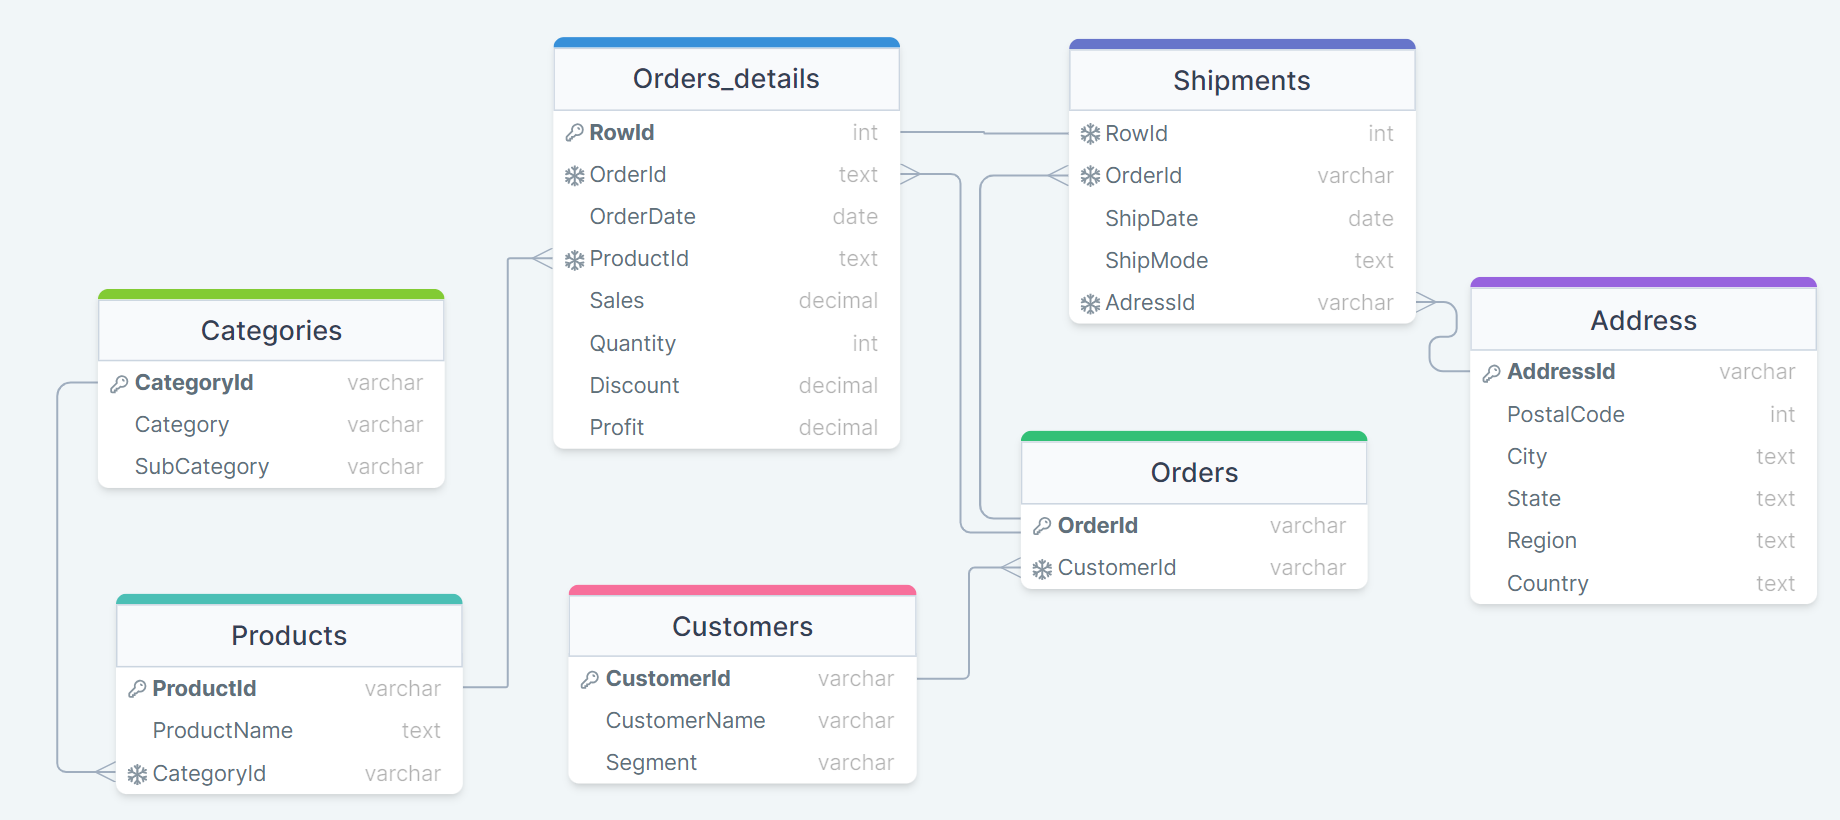

1. Analysis of Temporal Trends:

- How do sales and Profits evolve from year to year?
- What are the seasonal trends in sales?
- How are orders distributed by month or quarter?

2. Analysis of Sales by Product Category:

- What are the total sales for each product category?
- Which product categories are the most profitable?
- Are there any categories showing losses?
- How do sales and Profits compare between different product subcategories?

3. Analysis of Product Performance:

- Which products are the best sellers in terms of quantity and revenue?
- What is the profitability of products in terms of generated profits?
- What are the products making 80% of the Profit since 2016?


4. Customer Analysis:

- How are sales distributed by customer segment?
- What is the customer loyalty and retention over time?
- Which regions or countries have the most active customers?

5. Logistical Performance Analysis:

- What are the most used delivery modes and their impact on delivery times?
- How are postal codes distributed to identify areas with high demand?

6. Regional Performance Analysis:

- How are sales distributed by region or state?
- What are the differences in purchasing behavior between regions?

7. Profitability Analysis:

- What is the average profit margin for each order?
- Which orders are the most and least profitable?
- How does profitability vary by customer or customer segment?

8. Analysis of Discounts:

- Is there a correlation between discounts given and sales?
- What is the effectiveness of discounts in increasing sales?
- How do given discounts vary by product category or customer segment?


## Importing libraries:

In [1]:
# Import 
import sqlite3
import pandas as pd
import plotly.express as px

## Connection to the SQL database:

In [2]:
# connecting to the SuperStore database
connection = sqlite3.connect("DB_browser/SuperStore.db")

print("Connected to the database")

Connected to the database


## Functions Sections:

In [3]:
# Display the query in a dataframe
def sql_to_dataframe(query):
    """
    Executes a SQL query on a given database connection and returns the results in the form of a pandas DataFrame.

    Parameters:
    - query: A string representing the SQL query to be executed.

    Return Value:
    A pandas DataFrame containing the results of the SQL query.

    Functionality:
    The function takes a SQL query as input and uses the pd.read_sql() method from the pandas library to execute 
    the query on the provided database connection. It then fetches the results from the database and loads them 
    into a DataFrame. Finally, the DataFrame containing the query results is returned.

    Usage:
    To use this function, provide it with a valid SQL query as a string. For example:
        query = "SELECT * FROM your_table_name"
        result_df = sql_to_dataframe(query)
    This would execute the specified SQL query on the database connection and store the results in the DataFrame 'result_df'.
    """
    df = pd.read_sql(query, connection)
    return df

# Data Exploration:

## Analysis of Temporal Trends:
### How do sales and Profits evolve from year to year?

In [116]:
sales_years = '''   
                    SELECT 
                        STRFTIME('%Y', OrderDate)'Year', 
                        ROUND(SUM(Sales), 2)'TotalSales'
                    FROM Orders_details
                    GROUP BY Year;
                '''
                
df = sql_to_dataframe(sales_years)



df['sales_variation_rate'] = round((df['TotalSales'].pct_change()) * 100, 2)

display(df)

fig = px.bar(df, x='Year', y='TotalSales', text='sales_variation_rate',
             title='Sales growth from 2014 to 2018')
# Add percentage to the hover text
fig.update_traces(texttemplate='%{text}%')
fig.show()

,Year,TotalSales,sales_variation_rate
0,2014,484247.50,NaN
1,2015,470532.51,-2.83
2,2016,609205.60,29.47
3,2017,733215.26,20.36


In [172]:
profits_year = '''   
                    SELECT 
                        STRFTIME('%Y', OrderDate)'Year', 
                        ROUND(SUM(Profit), 2)'TotalProfits'
                    FROM Orders_details
                    GROUP BY Year;
                '''
                
df = sql_to_dataframe(profits_year)



df['profit_variation_rate'] = round((df['TotalProfits'].pct_change()) * 100, 2)

display(df)

fig = px.bar(df, x='Year', y='TotalProfits', text='profit_variation_rate',
             title='Profit growth from 2014 to 2018')
# Add percentage to the hover text
fig.update_traces(texttemplate='%{text}%')
fig.show()

,Year,TotalProfits,profit_variation_rate
0,2014,49543.97,NaN
1,2015,61618.60,24.37
2,2016,81795.17,32.74
3,2017,93439.27,14.24


### What are the seasonal trends in sales?

In [188]:
sales_month = '''   
                    SELECT 
                        STRFTIME('%m', OrderDate)'Month', 
                        ROUND(SUM(Sales), 2)'TotalSales'
                    FROM Orders_details
                    GROUP BY Month;
                '''
                
df = sql_to_dataframe(sales_month)
display(df.head(3))

fig = px.bar(df, x='Month', y='TotalSales', title='Monthly Sales')

# Calculate mean of TotalSales
trend_line = pd.Series([df['TotalSales'].mean()] * len(df))

fig.add_scatter(x=df['Month'], y=trend_line, mode='lines', name='Trend Line', line=dict(color='rgba(0,0,0,0.2)'))

fig.show()

,Month,TotalSales
0,01,94924.84
1,02,59751.25
2,03,205005.49


### How are orders distributed by month or quarter?

In [158]:
orders_month_year = '''   
                    SELECT
                        STRFTIME('%Y', OrderDate)'Year',
                        STRFTIME('%m', OrderDate)'Month', 
                        COUNT(OrderId)'TotalOrder'
                    FROM Orders_details
                    GROUP BY Year, Month;
                '''
df = sql_to_dataframe(orders_month_year)

fig= px.line(df, x='Month', y='TotalOrder', color='Year', title='Monthly Orders by Year')
fig.show()

## Analysis of Sales by Product Category:

### What are the total sales for each product category?

In [150]:
category_sales = '''   
                    SELECT c.Category, ROUND(SUM(o.Sales),2)'TotalSales'
                    FROM Categories AS c
                    JOIN Products AS p
                    ON c.CategoryID = p.CategoryId
                    JOIN Orders_details AS o
                    ON p.ProductId = o.ProductId
                    GROUP BY c.Category
                    ORDER BY
                        TotalSales DESC;
                '''
                
# Dataframe 
df = sql_to_dataframe(category_sales)
# Add percentage column for each Category
df['Percentage'] = round((df['TotalSales'] / df['TotalSales'].sum()) * 100,2)

df

,Category,TotalSales,Percentage
0,Technology,836154.03,36.4
1,Furniture,741999.80,32.3
2,Office Supplies,719047.03,31.3


### Which product categories are the most profitable?

In [160]:
category_profit = '''   
                            SELECT 
                                c.Category, ROUND(SUM(o.Sales),2)'TotalSales',
                                ROUND(SUM(o.Profit), 2)'TotalProfits'
                            FROM Categories AS c
                            JOIN Products AS p
                            ON c.CategoryID = p.CategoryId
                            JOIN Orders_details AS o
                            ON p.ProductId = o.ProductId
                            GROUP BY c.Category
                            ORDER BY
                                TotalProfits DESC;
                        '''

df = sql_to_dataframe(category_profit)

df       

,Category,TotalSales,TotalProfits
0,Technology,836154.03,145454.95
1,Office Supplies,719047.03,122490.80
2,Furniture,741999.80,18451.27


### Are there any categories showing losses?

In [159]:
category_losses = '''   
                    SELECT c.Category, ROUND(SUM(o.Profit),2)'TotalLoss'
                    FROM Categories AS c
                    JOIN Products AS p
                    ON c.CategoryID = p.CategoryId
                    JOIN Orders_details AS o
                    ON p.ProductId = o.ProductId
                    WHERE o.Profit < 0
                    GROUP BY c.Category
                    ORDER BY
                        TotalLoss ASC;
                '''
                
# Dataframe 
df = sql_to_dataframe(category_losses)
# Add percentage column for each Category
df['% TotalProfit'] = round((df['TotalLoss'] / 286397.02 * 100),2)
df


,Category,TotalLoss,% TotalProfit
0,Furniture,-60936.11,-21.28
1,Office Supplies,-56615.26,-19.77
2,Technology,-38579.92,-13.47


In [171]:
category_losses_year = '''   
                    SELECT 
                    STRFTIME('%Y', OrderDate)'Year',
                    c.Category, ROUND(SUM(o.Profit),2)'TotalLoss'
                    FROM Categories AS c
                    JOIN Products AS p
                    ON c.CategoryID = p.CategoryId
                    JOIN Orders_details AS o
                    ON p.ProductId = o.ProductId
                    WHERE o.Profit < 0
                    GROUP BY Year, c.Category
                    ORDER BY
                        Year ASC;
                '''
                
# Dataframe 
df = sql_to_dataframe(category_losses_year)

fig = px.bar(df, x='Year', y='TotalLoss', color='Category', title='Total Loss Category by Year')
fig.show()

### How do sales and Profits compare between different product subcategories?

In [256]:
subcategory_sales_profits = '''   
                    SELECT 
                        c.SubCategory, ROUND(SUM(o.Sales),2)'TotalSales',
                        ROUND(SUM(o.Profit),2)'TotalProfit'
                    FROM Categories AS c
                    JOIN Products AS p
                    ON c.CategoryID = p.CategoryId
                    JOIN Orders_details AS o
                    ON p.ProductId = o.ProductId
                    GROUP BY c.SubCategory
                    ORDER BY
                        TotalSales ASC;
                '''
                
df = sql_to_dataframe(subcategory_sales_profits)
df['Percentage'] = round((df['TotalProfit'] / df['TotalSales']) * 100)
display(df.head())

fig = px.bar(df.sort_values(by='Percentage', ascending=True), x='SubCategory', y='TotalSales', color='TotalProfit', text='Percentage',
             title='Total Sales and Profits by Sub-Category')
# Add percentage to the hover text
fig.update_traces(texttemplate='%{text}%')
fig.show()

,SubCategory,TotalSales,TotalProfit,Percentage
0,Fasteners,3024.28,949.52,31.0
1,Labels,12486.31,5546.25,44.0
2,Envelopes,16476.40,6964.18,42.0
3,Art,27118.79,6527.79,24.0
4,Supplies,46673.54,-1189.10,-3.0


## Analysis of Product Performance:

### Which products are the best sellers in terms of quantity and revenue?

In [375]:
products_quantity = '''   
                    SELECT 
                        c.Category, SubCategory, p.ProductName, 
                        SUM(o.Quantity)'TotalQuantity', SUM(o.Sales)'TotalSales', 
                        SUM(o.Profit)'TotalProfit'
                    FROM Orders_details AS o
                    JOIN Products AS p
                    ON o.ProductId = p.ProductId
                    JOIN Categories AS c
                    ON p.CategoryId = c.CategoryId
                    WHERE o.Profit > 0
                    GROUP BY o.ProductId
                    ORDER BY 
                        TotalQuantity DESC
                    LIMIT 5;
                '''
df = sql_to_dataframe(products_quantity)
display(df)

# Create Sunburst chart
fig = px.sunburst(df, path=['Category', 'SubCategory', 'ProductName'], values='TotalQuantity',
                  title='5 Best Seller Products by Quantity')

fig.show()

,Category,SubCategory,ProductName,TotalQuantity,TotalSales,TotalProfit
0,Office Supplies,Fasteners,Staples,215,755.470,292.2046
1,Office Supplies,Envelopes,Staple envelope,170,1686.812,751.6290
2,Office Supplies,Paper,Easy-staple paper,150,2504.192,1096.0292
3,Office Supplies,Art,Staples in misc. colors,86,478.812,124.0516
4,Office Supplies,Paper,Xerox 1881,70,2167.348,1006.4352


In [374]:
products_sales = '''   
                    SELECT 
                        c.Category, c.SubCategory, p.ProductName, 
                        SUM(o.Quantity)'TotalQuantity', SUM(o.Sales)'TotalSales', 
                        SUM(o.Profit)'TotalProfit'
                    FROM Orders_details AS o
                    JOIN Products AS p
                    ON o.ProductId = p.ProductId
                    JOIN Categories AS c
                    ON p.CategoryId = c.CategoryId
                    WHERE o.Profit > 0
                    GROUP BY o.ProductId
                    ORDER BY 
                        TotalSales DESC
                    LIMIT 5;
                '''
df = sql_to_dataframe(products_sales)
display(df)

fig = px.sunburst(df, path=['Category', 'SubCategory', 'ProductName'], values='TotalSales',
                  title='5 Best Seller Products by TotalSales')
fig.show()

,Category,SubCategory,ProductName,TotalQuantity,TotalSales,TotalProfit
0,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,20,61599.824,25199.9280
1,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,22,25165.602,11184.7120
2,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,38,18839.686,6983.8836
3,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,9,15749.910,5039.9712
4,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,19,15428.228,6395.5387


###  What is the profitability of products in terms of generated profits?

In [373]:
products_profits = '''   
                    SELECT 
                        c.Category, c.SubCategory, p.ProductName, 
                        SUM(o.Quantity)'TotalQuantity', SUM(o.Sales)'TotalSales', 
                        SUM(o.Profit)'TotalProfit'
                    FROM Orders_details AS o
                    JOIN Products AS p
                    ON o.ProductId = p.ProductId
                    JOIN Categories AS c
                    ON p.CategoryId = c.CategoryId
                    WHERE o.Profit > 0
                    GROUP BY o.ProductId
                    ORDER BY 
                        TotalProfit DESC
                    LIMIT 5;
                '''
df = sql_to_dataframe(products_profits)
df['%Profits'] = round((df['TotalProfit'] / df['TotalProfit'].sum()) * 100, 2)
display(df) 

fig = px.sunburst(df, path=['Category', 'SubCategory', 'ProductName'], values='TotalProfit',
                  title='5 Best Seller Products by TotalProfits')
fig.show()

,Category,SubCategory,ProductName,TotalQuantity,TotalSales,TotalProfit,%Profits
0,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,20,61599.824,25199.9280,44.97
1,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,22,25165.602,11184.7120,19.96
2,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,38,18839.686,6983.8836,12.46
3,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,19,15428.228,6395.5387,11.41
4,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,8,13985.926,6274.7668,11.20


### What are the products making 80% of Total Profits since 2016?

In [379]:
products_sales_pareto = '''   
                    SELECT
                        STRFTIME('%Y', o.OrderDate)'Year',
                        c.Category, c.SubCategory, p.ProductName, 
                        ROUND(SUM(o.Profit), 2)'TotalProfit'
                    FROM Orders_details AS o
                    JOIN Products AS p
                    ON o.ProductId = p.ProductId
                    JOIN Categories AS c
                    ON p.CategoryId = c.CategoryId
                    GROUP BY p.ProductName
                    HAVING Year >= '2016'
                    ORDER BY 
                        TotalProfit DESC;
                '''
df = sql_to_dataframe(products_sales_pareto)

df['CumulativePercentage'] = round((df['TotalProfit'].cumsum() / df['TotalProfit'].sum()) * 100)

df = df.loc[df['CumulativePercentage'] <= 80]
display(df)

fig = px.sunburst(df, path=['Category', 'SubCategory', 'ProductName'], values='TotalProfit', color='ProductName',
             title='Pareto analysis for products since 2016',
             labels={'TotalProfit': 'Total Profit'})

fig.show()




,Year,Category,SubCategory,ProductName,TotalProfit,CumulativePercentage
0,2016,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,25199.93,62.0
1,2016,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.97,71.0
2,2017,Technology,Copiers,Canon Image Class D660 Copier,1691.97,75.0
3,2017,Technology,Machines,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.20,80.0




- Which regions or countries have the most active customers?

## Customer Analysis:

### How are sales distributed by customer segment?

In [402]:
customer_sales_segment_year = '''   
                        SELECT
                            STRFTIME('%Y/%m', od.OrderDate)'Date',
                            c.Segment,
                            ROUND(SUM(od.Sales), 2)'Sales'
                        FROM Orders_details AS od
                        JOIN Orders AS o
                        ON od.OrderId = o.OrderId
                        JOIN Customers AS c
                        ON o.CustomerId = c.CustomerId
                        GROUP BY Date, c.Segment
                        ORDER BY
                            Date ASC;
                    '''
                    
df = sql_to_dataframe(customer_sales_segment_year)

fig = px.line(df, x='Date', y='Sales', color='Segment')
fig.show()

In [417]:
customer_sales_segment = '''   
                        SELECT
                            c.Segment,
                            ROUND(SUM(od.Sales), 2)'TotalSales'
                        FROM Orders_details AS od
                        JOIN Orders AS o
                        ON od.OrderId = o.OrderId
                        JOIN Customers AS c
                        ON o.CustomerId = c.CustomerId
                        GROUP BY c.Segment;
                    '''
                    
df = sql_to_dataframe(customer_sales_segment)
display(df)

fig = px.pie(df, values='TotalSales', names='Segment',
             title='Total Sales by Customers Segmentation')
fig.show()

,Segment,TotalSales
0,Consumer,1161401.34
1,Corporate,706146.37
2,Home Office,429653.15


### What is the customer loyalty and retention over time?

In [427]:
unique_customer_year = '''
                                SELECT
                                    STRFTIME('%Y', OrderDate)'Year',
                                    COUNT(DISTINCT CustomerId)'UniqueCustomers'
                                FROM Orders_details AS od
                                JOIN Orders AS o
                                ON od.OrderId = o.OrderId
                                GROUP BY Year;
                            '''
                            
df = sql_to_dataframe(unique_customer_year)

df['new_variation_rate'] = round((df['UniqueCustomers'].pct_change()) * 100, 2)

display(df)

fig = px.bar(df, x='Year', y='UniqueCustomers', text='new_variation_rate',
             title='New Customer growth from 2014 to 2017')

# Add percentage to the hover text
fig.update_traces(texttemplate='%{text}%')
fig.show()

,Year,UniqueCustomers,new_variation_rate
0,2014,595,NaN
1,2015,573,-3.70
2,2016,638,11.34
3,2017,693,8.62


## Analysis of Discounts:

### Is there a correlation between discounts given and sales?

In [288]:
sales_discounts = '''   
                    SELECT SUM(Sales)'Sales', Discount
                    FROM Orders_details
                    GROUP BY Discount;
                '''
                
df = sql_to_dataframe(sales_discounts)
display(df)
correlation = df['Discount'].corr(df['Sales'])

print("Correlation coefficient between discounts and sales: ", round(correlation, 2))

# Create scatter plot with regression line
fig = px.bar(df, x='Discount', y='Sales', title='Sales vs. Discounts')

fig.show()

,Sales,Discount
0,1.087908e+06,0.00
1,5.436935e+04,0.10
2,2.755852e+04,0.15
3,7.645944e+05,0.20
4,1.032267e+05,0.30
5,1.449346e+04,0.32
6,1.164178e+05,0.40
7,5.484974e+03,0.45
8,5.891854e+04,0.50
9,6.644700e+03,0.60


Correlation coefficient between discounts and sales:  -0.57
